Este experimento consiste en dejar caer una aguja sobre una hoja rayada y anotar las veces que la aguja cruza alguna de las rayas. Después de lanzar la aguja muchísimas veces el Conde de Buffon comprobó que su experimento estaba íntimamente relacionado con el número $π$.

Por lo tanto, si lanzamos al azar, una aguja de longitud L sobre una superficie en la que hay dibujadas líneas paralelas separadas una distancia D, la probabilidad de que la aguja corte a una línea es:

$$\frac{\pi L}{2D}$$

Vamos a utilizar este resultado para medir $\pi$.

Esta probabilidad tambien se puede expresar mediante la relación $\frac{n}{x}$, donde $x$ es el número de veces que la aguja corta a una línea y $n$ es el número total de tiradas. Entonces:

$$\frac{\pi L}{2D}=\frac{n}{x}⟹\hat{π}=\frac{2nD}{xL}$$

Este es nuestro estimador de $π$.

Generamos la simulación.

In [3]:
import numpy as np
import random as rnd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [4]:
def buffon(N, L, D):
    crosses = 0
    for i in range(N):
        # La distancia desde el centro de la aguja a la línea más cercana
        y = rnd.uniform(0, D/2)
        # El ángulo que forma la aguja con las líneas paralelas
        theta = rnd.uniform(0, np.pi/2)
        # Contar si la aguja cruza la línea
        if y <= (L / 2) * np.sin(theta):
            crosses += 1
    # Estimar pi usando la fórmula
    if crosses == 0:
        return 0  # Evitar división por cero
    pi_estimate = (2 * L * N) / (crosses * D)
    return pi_estimate

In [5]:
def estimacion(N, L, D):
    lis = []
    for i in range(1, N + 1):
        pi_estimate = buffon(i, L, D)
        lis.append(pi_estimate)
    return lis

N = 500
L = 1  # Longitud de la aguja
D = 1  # Distancia entre las líneas
G = estimacion(N, L, D)
print("pi: ", G[-1])

pi:  3.067484662576687


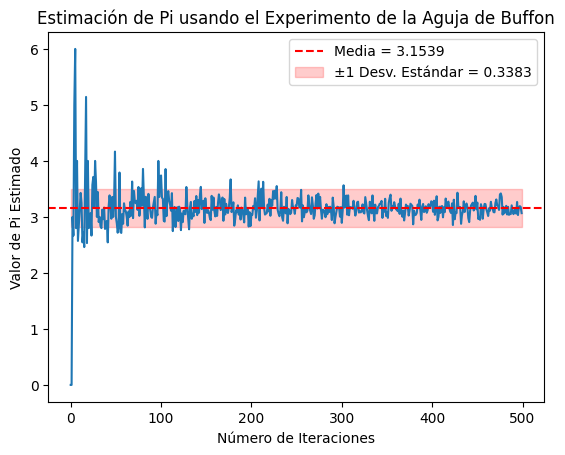

In [8]:
# Graficar la estimación de Pi
plt.plot(G)

# Cálculo de la media y desviación estándar
media = np.mean(G)
desviacion_estandar = np.std(G)

# Graficar la media
plt.axhline(y=media, color='r', linestyle='--', label=f'Media = {media:.4f}')

# Graficar una banda de ±1 desviación estándar alrededor de la media
plt.fill_between(range(N), media - desviacion_estandar, media + desviacion_estandar, color='r', alpha=0.2, label=f'±1 Desv. Estándar = {desviacion_estandar:.4f}')

# Agregar etiquetas y leyenda
plt.xlabel('Número de Iteraciones')
plt.ylabel('Valor de Pi Estimado')
plt.title('Estimación de Pi usando el Experimento de la Aguja de Buffon')
plt.legend()
plt.show()

In [9]:
# Imprimir los valores de media y desviación estándar
print("Media =", media)
print("Desviación Estándar =", desviacion_estandar)

Media = 3.1539181684307787
Desviación Estándar = 0.3382978703223226


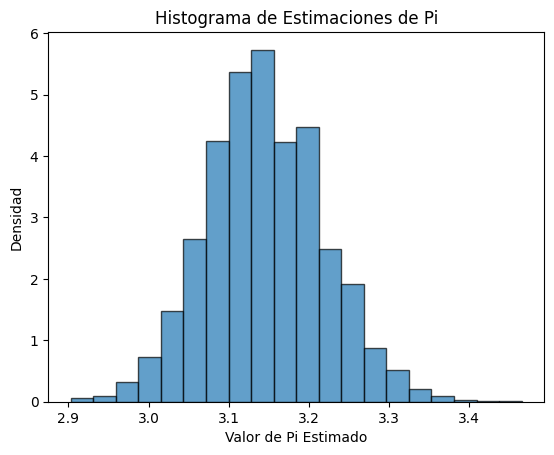

In [10]:
def simulacion(M, N, L, D):
    r = []
    for i in range(M):
        R = buffon(N, L, D)
        r.append(R)  # Guardar solo el último valor de cada estimación
    return r

# Realizar 5000 simulaciones con 1000 iteraciones cada una
M = 5000
N = 1000
S = simulacion(M, N, L, D)

# Calcular la media y desviación estándar de las simulaciones
media_sim = np.mean(S)
desviacion_sim = np.std(S)

# Graficar el histograma de las simulaciones
plt.hist(S, bins=20, density=True, edgecolor='black', alpha=0.7)

# Agregar etiquetas y leyenda
plt.xlabel('Valor de Pi Estimado')
plt.ylabel('Densidad')
plt.title('Histograma de Estimaciones de Pi')
plt.show()